## Title: Logistic Regression with NumPy and PyTorch 

## Project: Breast Cancer detection from Images

## Author: Aubrey Undi Phiri

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rmenegaux/Intro-to-Neural-Nets-AIMS-2025/blob/main/assignment1_logistic_regression.ipynb)


### Introduction
One of the major tasks in neural networks is classification. For binary classification, we label objects as 0 or 1, grouping those with similar characteristics together. One of the methods used for these classification tasks is logistic regression, which uses a function known as the sigmoid function. This function takes a linear combination of the input data ($z$) and outputs a probability between 0 and 1, which can then be thresholded to assign a class label (0 or 1).

This is a useful tool, with known applications incluidng spam detection, identifying tumors and many other medical diagnotics. This notebook is a comibation of theory and a practical project, aiming to give a deeper understanding on the sigmoid functiona and also implements an actual classification task.  

### Description of the implemented project on Question 5

The projects uses a tabular dataset containing numerical features extracted from digitized images of breast tissue samples known as Wisconsin dataset from the scikit-learn python library. The Breast Cancer Wisconsin dataset is a real-world medical dataset containing measurements from digitized images of breast tissue samples. Each sample is described by 30 numeric features that capture characteristics of cell nuclei, such as radius, texture, perimeter, area, and smoothness. The goal is to classify each sample as either malignant (cancerous) or benign (non-cancerous).

In this classification task, we aim to use logistic regression to build a model that can accurately predict whether a tumor is malignant or benign based on these features. This helps demonstrate how machine learning can assist in medical diagnosis by learning patterns in real patient data.

### Binary Classification with Logistic Regression

Logistic regression is a linear classification algorithm that predicts the probability of a binary outcome. Given an input feature vector **x**, the model computes:

$$
z = w^T x
$$

where $w$ is the weight vector. The bias term $b$ has been omitted for simplicity, but can be accounted for by concatenating a 1 to $x$.

Instead of using this value directly for classification, we apply the **sigmoid function**:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

This maps the output to a probability between 0 and 1: 
$$\sigma(z) = \mathbb{P}[y=1 | x]$$
The predicted class can then be determined by thresholding:
$$
\hat{y} =
\begin{cases}
1, & \text{if } \sigma(z) \geq 0.5 \\
0, & \text{otherwise}
\end{cases}
$$

The goal in training logistic regression models for any classification task is to minimize the difference between the predicted probabilities and the true labels. This difference is measured using the **binary cross-entropy loss ($L$)**, which quantifies how well the predicted probabilities match the actual binary outcomes.

$$ 
L = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] 
$$

$$
L = - \frac{1}{N} \sum_{i=1}^{N} \left( y_i \log \sigma(z_i) + (1 - y_i) \log (1 - \sigma(z_i)) \right)
$$

where **y** is the true label and **ŷ** is the predicted probability.

Gradient descent is used to update **w** and **b** iteratively to minimize this loss.


### Question 1: Computing the gradients
Proceeding step by step:

i\) Compute the derivative of $z \to \log \sigma(z)$


To compute the derivative of $ z \mapsto \log \sigma(z) $, 


We define:
$$
f(z) = \log \sigma(z)
$$
where $ \sigma(z) $ is the **sigmoid function**:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}.
$$

**Computing the derivative:**
Using the chain rule:
$$
\frac{d}{dz} \log \sigma(z) = \frac{1}{\sigma(z)} \cdot \frac{d}{dz} \sigma(z).
$$

The derivative of the sigmoid function is:
$$
\frac{d}{dz} \sigma(z) = \frac{e^{-z}}{(1 + e^{-z})^2}= \frac{1}{(1 + e^{-z})}\frac{e^{-z}}{(1 + e^{-z})}
$$


$$
\sigma(z) = \frac{1}{1 + e^{-z}}, \quad 1 - \sigma(z) = \frac{e^{-z}}{1 + e^{-z}}
$$

$$
\frac{d}{dz} \log \sigma(z) = \frac{\sigma'(z)}{\sigma(z)}
$$

$$
= \frac{\sigma(z) (1 - \sigma(z))}{\sigma(z)}
$$

$$
= 1 - \sigma(z)
$$


**Conclusion:**
Thus, the derivative of $ z \mapsto \log \sigma(z) $ is:

$$
\frac{d}{dz} \log \sigma(z) = 1 - \sigma(z).
$$

---

ii\) **Compute the gradient w.r.t $w$ of $z(w) = w^T x$**



To compute the gradient of $ z(w) = w^T x $ with respect to $ w $, we proceed as follows:

**Given**
$$
z(w) = w^T x
$$

**Gradient computation:**

The gradient of $ w^T x $ with respect to $ w $ is given by:

$$
\nabla_w z(w) = \frac{\partial}{\partial w} (w^T x).
$$

Using standard matrix calculus results, we know that:

$$
\frac{\partial}{\partial w} (w^T x) = x.
$$


Thus, the gradient of $ z(w) = w^T x $ with respect to $ w $ is:

$$
\nabla_w z(w) = x.
$$

---



iii) Using the chain rule, deduce the gradient of $w \to \log \sigma(z(w))$
- Deduce the gradient of $L$ w.r.t. $w$: $\nabla_w L$



**Compute the gradient of $ w \to \log \sigma(z(w)) $**

We define:
$$ z(w) = w^T x $$
and recall that the sigmoid function is:
$$ \sigma(z) = \frac{1}{1 + e^{-z}}. $$

We want to compute:
$$ \nabla_w \log \sigma(z(w)). $$

**Using the chain rule:**
By the chain rule:
$$
\nabla_w \log \sigma(z(w)) = \frac{d}{dz} \log \sigma(z) \cdot \nabla_w z(w).
$$

From our previous result:
$$
\frac{d}{dz} \log \sigma(z) = 1 - \sigma(z).
$$

Since:
$$
\nabla_w z(w) = x,
$$
we substitute:

$$
\nabla_w \log \sigma(z(w)) = (1 - \sigma(z)) x.
$$




iv\) Deduce the gradient of $L$ w.r.t. $w$: $\nabla_w L$
 **Define the Loss Function**  

For logistic regression, we use the **binary cross-entropy loss**:  

$$
L = - \frac{1}{N} \sum_{i=1}^{N} \left( y_i \log \sigma(z_i) + (1 - y_i) \log (1 - \sigma(z_i)) \right)
$$

where:  
- $ y_i $ is the actual label ($ 0 $ or $ 1 $)  
- $ \sigma(z_i) $ is the predicted probability  
- $ z_i = w^T x_i $  

Since logistic regression models the probability of class 1 as  

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

we will differentiate $ L $ with respect to $ w $.



**Differentiate $ L $ with Respect to $ z $**  

We first compute $ \frac{dL}{dz_i} $ for a single data point.  

$$
L_i = - \left( y_i \log \sigma(z_i) + (1 - y_i) \log (1 - \sigma(z_i)) \right)
$$

Differentiating $ L_i $ with respect to $ z_i $, we apply the chain rule:  

$$
\frac{dL_i}{dz_i} = - \left( y_i \frac{1}{\sigma(z_i)} \cdot \frac{d\sigma}{dz} + (1 - y_i) \frac{1}{1 - \sigma(z_i)} \cdot \frac{d(1-\sigma)}{dz} \right).
$$

Since

$$
\frac{d\sigma}{dz} = \sigma(z)(1 - \sigma(z)),
$$

we substitute this into our equation:  

$$
\frac{dL_i}{dz_i} = - \left( y_i \frac{1}{\sigma(z_i)} \sigma(z_i)(1 - \sigma(z_i)) - (1 - y_i) \frac{1}{1 - \sigma(z_i)} \sigma(z_i)(1 - \sigma(z_i)) \right).
$$

Simplifying,

$$
\frac{dL_i}{dz_i} = - \left( y_i (1 - \sigma(z_i)) - (1 - y_i) \sigma(z_i) \right).
$$

Rearrange terms:

$$
\frac{dL_i}{dz_i} = \sigma(z_i) - y_i.
$$

Thus, for the entire dataset,

$$
\frac{dL}{dz} = \frac{1}{N} \sum_{i=1}^{N} (\sigma(z_i) - y_i).
$$



**Compute the Gradient with Respect to $ w $**  

Since $ z_i = w^T x_i $, we differentiate:

$$
\frac{dz_i}{dw} = x_i.
$$

By the chain rule:

$$
\nabla_w L = \frac{1}{N} \sum_{i=1}^{N} (\sigma(z_i) - y_i) \cdot x_i.
$$



**Expression for the Gradient**  

Thus, the gradient of the loss function with respect to $ w $ is:

$$
\nabla_w L = \frac{1}{N} \sum_{i=1}^{N} (\sigma(w^T x_i) - y_i) x_i.
$$

This gradient is used in **gradient descent** to iteratively update $ w $:

$$
w \leftarrow w - \alpha \nabla_w L.
$$

where $ \alpha $ is the learning rate.



### Question 2: Plot the sigmoid function

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


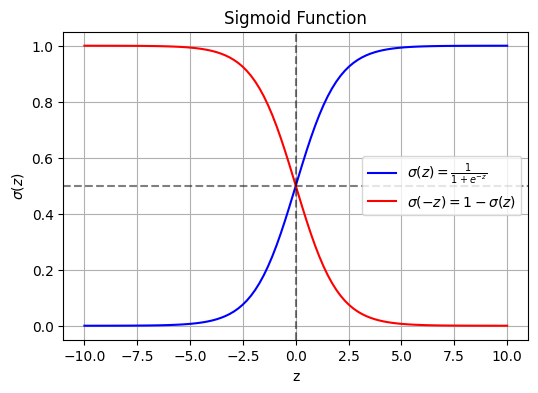

In [94]:

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) 

# Generate input values
z = np.linspace(-10, 10, 100)
complementary_sigmoid = sigmoid(-z)

# Plot sigmoid function
plt.figure(figsize=(6, 4))
plt.plot(z, sigmoid(z), label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', color='b')
plt.plot(z, sigmoid(-z), label=r'$\sigma(-z) = 1 - \sigma(z)$', color='r')

plt.axvline(0, color='k', linestyle='--', alpha=0.5)
plt.axhline(0.5, color='k', linestyle='--', alpha=0.5)
plt.xlabel("z")
plt.ylabel(r"$\sigma(z)$")
plt.title("Sigmoid Function")
plt.legend()
plt.grid(True)
plt.show()

### Comment on the sigmoid function plot

The sigmoid function, defined as $σ(z) = \frac{1}{ (1 + e^{(-z)})}$, is a mathematical function that maps any real-valued number to a value between 0 and 1.

It is commonly used in machine learning, especially in logistic regression and neural networks, to model probabilities.

In the plot above:
- The blue curve represents the sigmoid function $σ(z)$. It starts near 0 for large negative values of z, increases rapidly around z=0, and approaches 1 for large positive values of z.
- The red curve represents the complementary sigmoid function $σ(-z)$, which is equal to $1 - σ(z)$. This is because the sigmoid function is symmetric around z=0.

Key features of the plot:
- The vertical dashed line at z=0 indicates the point of symmetry. At this point, $σ(z) = 0.5$.
- The horizontal dashed line at y=0.5 shows that the sigmoid function outputs 0.5 when z=0.
- The sigmoid function is S-shaped (sigmoidal) and asymptotically approaches 0 and 1 as z moves toward -$\infty$ and +$\infty$, respectively.

The plot helps visualize how the sigmoid function transforms input values into probabilities, which is useful for binary classification tasks.

To control how wide or close to zero the sigmoid function is, we can scale the input \( z \) by a factor \( k \). The modified sigmoid function becomes:

$$
\sigma(z) = \frac{1}{1 + e^{-kz}}
$$

Here, \( k \) is a scaling factor that determines the steepness of the sigmoid curve:

1. **When \( k > 1 \):**
    - The sigmoid function becomes steeper.
    - The transition from 0 to 1 happens more quickly, making the function more sensitive to changes in \( z \) near 0.

2. **When \( 0 < k < 1 \):**
    - The sigmoid function becomes wider and less steep.
    - The transition from 0 to 1 happens more gradually, making the function less sensitive to changes in \( z \).

3. **When \( k < 0 \):**
    - The sigmoid function flips horizontally, reversing the output behavior.

This scaling factor \( k \) is useful in applications where we want to adjust the sensitivity of the sigmoid function to input changes. For example, in machine learning, scaling the input \( z \) can help control the gradient during optimization.

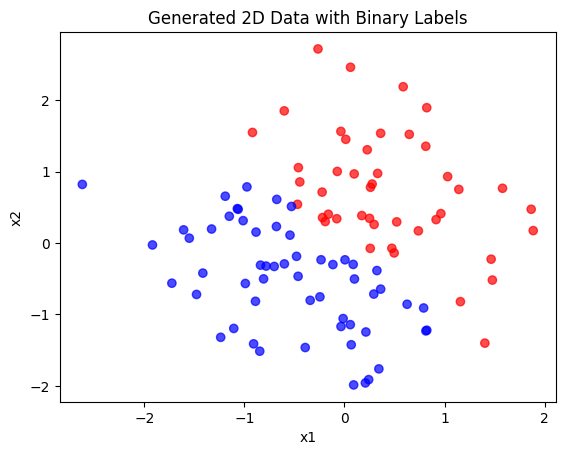

In [95]:
# Generate synthetic 2D classification data
np.random.seed(42)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Binary classification

def plot_decision_boundary(model, X, y):
    '''
    Plots the decision function of model

    model(X) should output probabilities y_hat
    '''
    xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    # Convert grid to tensor if model is a PyTorch model
    if isinstance(X, torch.Tensor):
        grid_tensor = torch.tensor(grid, dtype=torch.float32)
        z = model(grid_tensor).detach().numpy()  # Ensure NumPy output
    else:
        z = model(grid)  # Assume NumPy model outputs NumPy array

    z = z.reshape(xx.shape)

    plt.contourf(xx, yy, z, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.2)
    plt.scatter(np.array(X[:, 0]), np.array(X[:, 1]), c=np.array(y), cmap='bwr', edgecolor='k')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Decision Boundary for Logistic Regression")
    plt.show()

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Generated 2D Data with Binary Labels")
plt.show()



### **Explanation of the Output**  

1. **Binary Classification Dataset**  
   - The plot represents a **2D dataset** with binary labels.  
   - Each point corresponds to a data sample with two features:  
     $$ X = (x_1, x_2) $$  
   - The points are color-coded based on their labels:  
     - **Red** represents one class (e.g., $ y = 1 $).  
     - **Blue** represents the other class (e.g., $ y = 0 $).  

2. **Data Generation Process**  
   - The dataset appears to be generated from a normal distribution with different means for the two classes.  
   - If the data was synthetically generated, it could follow this formulation:  
     $$ x_1, x_2 \sim \mathcal{N}(\mu, \Sigma) $$  
     where $ \mathcal{N} $ represents a normal distribution, and $ \mu $, $ \Sigma $ are the mean and covariance matrix.  
   - Labels are assigned using a threshold function based on a **linear decision boundary**:  
     $$ y =  
     \begin{cases}  
     1, & w_1 x_1 + w_2 x_2 + b \geq 0 \\  
     0, & \text{otherwise}  
     \end{cases}  
     $$  
   - This resembles a **logistic regression decision rule**, where the sigmoid function is applied to determine the probability of belonging to class 1:  
     $$ P(y=1 | x) = \sigma(w^T x + b) $$  
     where  
     $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$  

3. **Interpretation of the Image**  
   - The separation between red and blue points suggests that a linear classifier like **logistic regression** is suitable for modeling this dataset.  
   - The **logistic regression model** learns a decision boundary that best separates these two groups.  
   - If training is successful, we should see a **linearly separable boundary** in the final decision plot.  



### Question 3: Gradient descent
(a) Code the binary cross-entropy loss

(b) Complete the 3 main methods of the `LogisticRegression` class:
- `predict(X)` computes predicted probabilities using the sigmoid function.
- `compute_gradients(X, y)` computes the gradients for logistic regression using Binary Cross-Entropy (BCE) loss.
- `fit(X, y)` updates `self.w` with gradient descent to fit data `X` and `y`


In [96]:
def bce_loss(y_hat, y):
    '''
    Returns the binary cross-entropy (BCE) loss for predicted probabilities `y_hat` in [0,1]
    and ground-truth binary labels `y`
    '''
    episilon = 1e-15  # Small value to avoid taking log(0)
    y_hat = np.clip(y_hat, episilon, 1 - episilon)  # Clip values to avoid log(0)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


In [97]:
class LogisticRegression:
    """
    A simple logistic regression model using gradient descent.

    Attributes:
        w (np.ndarray): Model weights (parameters).
        b (float): Model bias.

    Methods:
        predict(X): Computes the predicted probabilities using the sigmoid function.
        compute_gradients(X, y): Computes the gradients for logistic regression using Binary Cross-Entropy (BCE) loss.
        fit(X, y, learning_rate, num_epochs): Trains the model using gradient descent.
    """
    def __init__(self, input_dim):
        """
        Initializes the logistic regression model with random weights.

        Args:
            input_dim (int): Number of input features (dimensions of X).
        """
        self.w = np.random.randn(input_dim)  # Initialize weights randomly
        self.b = 0  # Initialize bias to zero

    def sigmoid(self, z):
        """sigmoid function to prevent overflow issues."""
        return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))

    def predict(self, X):
        """
        Computes the predicted probabilities using the sigmoid function.

        Args:
            X (np.ndarray): Input feature matrix of shape (num_samples, num_features).

        Returns:
            np.ndarray: Predicted probabilities in range [0,1], of shape (num_samples,).
        """
        z = np.dot(X, self.w) + self.b  # Linear combination
        return self.sigmoid(z)  # Apply sigmoid function
    
    def __call__(self, X):
        return self.predict(X)

    def compute_gradients(self, X, y):
        '''
        Compute the gradients for logistic regression using Binary Cross-Entropy (BCE) loss.

        Arguments:
        x -- Input features, shape (N, d), where N is the number of samples and d is the number of features.
        y -- Binary labels (0 or 1), shape (N,).

        Returns:
        grad_w -- Gradient of the BCE loss with respect to self.w, shape (d,).
        '''
        m = X.shape[0]  # Number of samples
        y_hat = self.predict(X)  # Predicted probabilities
        dz = y_hat - y  # Ensure shapes are compatible
        grad_w = np.dot(X.T, dz) / m  # Gradient w.r.t weights
        db = np.sum(dz) / m  # Gradient w.r.t bias
        return grad_w, db

    def fit(self, X, y, learning_rate=0.01, num_epochs=100):
        """
        Trains the logistic regression model using gradient descent.

        Args:
            X (np.ndarray): Input feature matrix of shape (num_samples, num_features).
            y (np.ndarray): Binary target labels of shape (num_samples,).
            num_epochs (int): Number of training iterations (default: 100).
            learning_rate (float): Step size for gradient updates (default: 0.1).
        """
        for epoch in range(num_epochs):
            # Compute the gradient of the loss function with respect to weights
            grad_w, db = self.compute_gradients(X, y)  # Compute gradients
            self.w -= learning_rate *grad_w  # Update weights
            self.b -= learning_rate * db  # Update bias

            # Print loss every 10 epochs
            if epoch % 10 == 0:
                y_hat = self.predict(X)
                loss = bce_loss(y_hat, y)
                print(f"Epoch {epoch}: Loss={loss:.4f}")


Epoch 0: Loss=0.4228
Epoch 10: Loss=0.2427
Epoch 20: Loss=0.1956
Epoch 30: Loss=0.1710
Epoch 40: Loss=0.1552
Epoch 50: Loss=0.1438
Epoch 60: Loss=0.1350
Epoch 70: Loss=0.1280
Epoch 80: Loss=0.1222
Epoch 90: Loss=0.1173


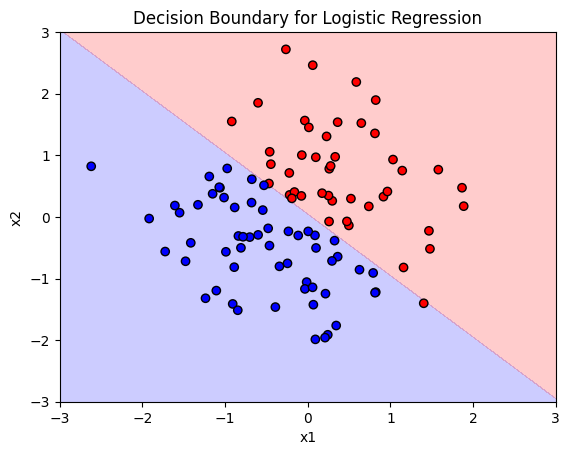

In [98]:
# Create a Logistic Regression model
model = LogisticRegression(input_dim=2)
# Fit the model to the data
model.fit(X, y, learning_rate=1., num_epochs=100)

# Plot the results
plot_decision_boundary(lambda X: model.predict(X), X, y)


### Question 4 - Pytorch
---

Implement Logistic Regression for binary classification, using the `pytorch` library

There are two lines to complete: the layer list in the Module, and the forward pass in the optimization.

Epoch 0: Loss=0.554
Epoch 10: Loss=0.288
Epoch 20: Loss=0.253
Epoch 30: Loss=0.241
Epoch 40: Loss=0.235
Epoch 50: Loss=0.232
Epoch 60: Loss=0.230
Epoch 70: Loss=0.229
Epoch 80: Loss=0.228
Epoch 90: Loss=0.227


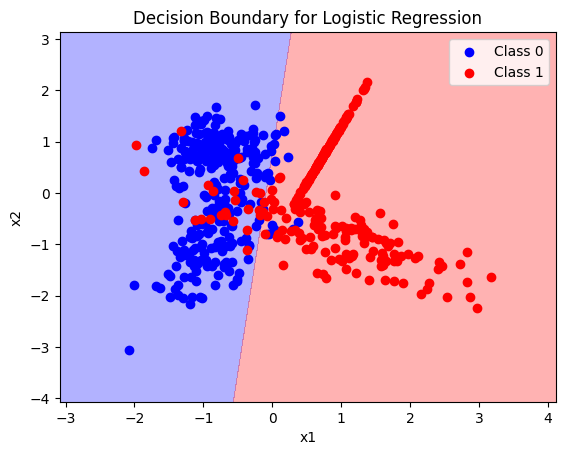

In [159]:

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Define logistic regression model
class LogisticRegression_pytorch(nn.Module):
    '''
    Logistic Regression model, for binary classification.

    Combination of a Linear layer and a sigmoid activation
    '''
    def __init__(self, input_dim):
        super(LogisticRegression_pytorch, self).__init__()
        # Define the layers composing logistic regression
        self.layers = nn.ModuleList([
            nn.Linear(input_dim, 1),
            nn.Sigmoid()
        ])
    
    def forward(self, x):
        '''
        Forward pass, iterate through the layers
        '''
        for layer in self.layers:
            x = layer(x)
        return x

# Initialize model, loss function, and optimizer
model = LogisticRegression_pytorch(input_dim=2)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1.)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Reset gradients
    optimizer.zero_grad()
    # Forward pass
    y_hat = model(X_tensor)
    # Compute the loss
    loss = criterion(y_hat, y_tensor)
    # Compute the gradients in the backward pass
    loss.backward()
    # Update the model parameters
    optimizer.step()
    
    if epoch % (num_epochs // 10) == 0:
        print(f"Epoch {epoch}: Loss={loss.item():.3f}")

plot_decision_boundary(model, X_tensor, y_tensor)


### Question 5 - Real-world testcase
---

Testing a logistic regression model implemented on the **Breast Cancer Wisconsin dataset** from `sklearn.datasets`. 

As stated in the introdcution, this is a binary classification dataset (malignant vs. benign tumors) with real medical features.

**Report the final test accuracy.**

The goal will be to improve the test accuracy, the most common way is to change the learning rate or number of epochs to check the influence.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features and labels

# Standardize features for better optimization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define logistic regression model (from previous question)
class LogisticRegression_pytorch(nn.Module):
    '''
    Logistic Regression model, for binary classification.

    Combination of a Linear layer and a sigmoid activation
    '''
    def __init__(self, input_dim):
        super(LogisticRegression_pytorch, self).__init__()
        self.layers = nn.ModuleList([
            nn.Linear(input_dim, 1),  # Linear layer: input_dim features to 1 output
            nn.Sigmoid()             # Sigmoid activation for binary classification
        ])
    
    def forward(self, x):
        '''
        Forward pass, iterate through the layers
        '''
        for layer in self.layers:
            x = layer(x)
        return x

# Initialize model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]  # 30 features in the breast cancer dataset
model = LogisticRegression_pytorch(input_dim=input_dim)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Learning rate

# Training loop
num_epochs = 500  # Increased epochs for better convergence
for epoch in range(num_epochs):
    # Reset gradients
    optimizer.zero_grad()
    # Forward pass
    y_hat = model(X_train_tensor)
    # Compute the loss
    loss = criterion(y_hat, y_train_tensor)
    # Compute the gradients in the backward pass
    loss.backward()
    # Update the model parameters
    optimizer.step()
    
    if epoch % (num_epochs // 10) == 0:
        print(f"Epoch {epoch}: Loss={loss.item():.3f}")

# Evaluate on the test set
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_probabilities = model(X_test_tensor)  # Get probabilities for test set
    y_probabilities = y_probabilities.numpy()  # Convert to numpy for comparison
y_pred = (y_probabilities > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = np.mean(y_pred.flatten() == y_test)
print(f"Test Accuracy: {accuracy:.1%}")

Epoch 0: Loss=0.471
Epoch 50: Loss=0.291
Epoch 100: Loss=0.234
Epoch 150: Loss=0.203
Epoch 200: Loss=0.183
Epoch 250: Loss=0.169
Epoch 300: Loss=0.159
Epoch 350: Loss=0.151
Epoch 400: Loss=0.144
Epoch 450: Loss=0.138
Test Accuracy: 98.2%


## Analysis

**Loss Trend**: The loss decreases steadily from 0.471 to 0.138 over 500 epochs, indicating effective learning. The convergence is smooth and consistent, with the loss dropping by approximately 70% from the initial value. This steady decline suggests that the model is optimizing well, and the learning rate is appropriate for stable training.

**Test Accuracy**: A test accuracy of 98.2% is excellent and aligns with expectations for the Breast Cancer Wisconsin dataset, where logistic regression typically achieves 95%+ accuracy. This high accuracy indicates that the model generalizes well to unseen data and correctly classifies most malignant and benign tumors.

**Comparison to Expectations**:
- The final loss of 0.138 is low, which is consistent with a well-trained logistic regression model on this dataset. The loss trajectory shows no signs of oscillation or divergence, suggesting stable optimization.
- The test accuracy of 98.2% is on the higher end of what logistic regression can achieve on this dataset, indicating that the model has learned a good decision boundary and is not suffering from significant underfitting or overfitting.

## Potential Issues

- **Convergence Speed**: The loss is still decreasing at epoch 450 (from 0.144 to 0.138 over the last 50 epochs), suggesting that the model might benefit from additional epochs or a slightly higher learning rate to converge faster. The slow decrease in loss toward the end indicates that the learning rate might be a bit conservative.
- **Overfitting Risk**: The high test accuracy (98.2%) suggests that overfitting is not a significant issue at this point. However, training for too many epochs (e.g., beyond 500) could eventually lead to overfitting, especially if the training loss continues to decrease while the test accuracy plateaus or decreases.
- **Dataset Imbalance**: The Breast Cancer Wisconsin dataset is slightly imbalanced (approximately 63% benign, 37% malignant). While the high accuracy suggests the model handles this well, it’s worth checking if the model performs equally well on both classes (e.g., by computing precision, recall, or an F1-score).

## Suggestions

- **Optimize Learning Rate**: Experiment with a slightly higher learning rate (e.g., 0.05 instead of the current value, which is 0.01 based on the convergence speed) to see if the model can converge faster without sacrificing accuracy. A higher learning rate might reduce the number of epochs needed to reach a similar loss.


## Conclusion

The Breast Cancer Wisconsin dataset is considered easy for machine learning because it is clean, well-structured, and highly informative. Mimicking this level of data quality and preprocessing in other datasets can similarly improve the accuracy of any machine learning model.

**Features are informative**: The dataset contains 30 well-engineered, quantitative features that strongly separate malignant and benign tumors.
**Low noise**: The data is clean, with few missing values or outliers.
**Linear separability**: The two classes (malignant and benign) are nearly linearly separable, allowing simple models like logistic regression to achieve high accuracy.
Balanced size: The dataset is not too small or too large, making it easy to train and validate models quickly.
**Standardized and widely used**: It has been preprocessed and used extensively in research, so best practices for handling it are well established.

As a result, even basic machine learning models can achieve very high accuracy (often above 95%) on this dataset.


